# Get the data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
dataset = pd.read_csv('/content/gdrive/MyDrive/Dockship/solar_radiation_prediction_ai_challenge-dataset/TRAIN.csv')
dataset = dataset.sort_values(['UNIXTime'], ascending = [True])
dataset.head()

,idx,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
17748,17748,1472724008,9/1/2016 12:00:00 AM,00:00:08,2.58,51,30.43,103,77.27,11.25,06:07:00,18:38:00
25149,25149,1472724310,9/1/2016 12:00:00 AM,00:05:10,2.83,51,30.43,103,153.44,9.00,06:07:00,18:38:00
4529,4529,1472725206,9/1/2016 12:00:00 AM,00:20:06,2.16,51,30.43,103,142.04,7.87,06:07:00,18:38:00
12164,12164,1472725809,9/1/2016 12:00:00 AM,00:30:09,2.25,51,30.43,103,67.42,11.25,06:07:00,18:38:00
250,250,1472726704,9/1/2016 12:00:00 AM,00:45:04,2.15,51,30.43,103,67.85,4.50,06:07:00,18:38:00


# Feature Engineering

In [ ]:
from datetime import datetime
from pytz import timezone
import pytz
hawaii= timezone('Pacific/Honolulu')
dataset.index =  pd.to_datetime(dataset['UNIXTime'], unit='s')
dataset.index = dataset.index.tz_localize(pytz.utc).tz_convert(hawaii)
dataset['MonthOfYear'] = dataset.index.strftime('%m').astype(int)
dataset['DayOfYear'] = dataset.index.strftime('%j').astype(int)
dataset['WeekOfYear'] = dataset.index.strftime('%U').astype(int)
dataset['TimeOfDay(h)'] = dataset.index.hour
dataset['TimeOfDay(m)'] = dataset.index.hour*60 + dataset.index.minute
dataset['TimeOfDay(s)'] = dataset.index.hour*60*60 + dataset.index.minute*60 + dataset.index.second
dataset['TimeSunRise'] = pd.to_datetime(dataset['TimeSunRise'], format='%H:%M:%S')
dataset['TimeSunSet'] = pd.to_datetime(dataset['TimeSunSet'], format='%H:%M:%S')
dataset['DayLength(s)'] = dataset['TimeSunSet'].dt.hour*60*60 \
                           + dataset['TimeSunSet'].dt.minute*60 \
                           + dataset['TimeSunSet'].dt.second \
                           - dataset['TimeSunRise'].dt.hour*60*60 \
                           - dataset['TimeSunRise'].dt.minute*60 \
                           - dataset['TimeSunRise'].dt.second
dataset.drop(['Data','Time','TimeSunRise','TimeSunSet'], inplace=True, axis=1)
dataset.head()

,idx,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,MonthOfYear,DayOfYear,WeekOfYear,TimeOfDay(h),TimeOfDay(m),TimeOfDay(s),DayLength(s)
UNIXTime,,,,,,,,,,,,,,,
2016-09-01 00:00:08-10:00,17748,1472724008,2.58,51,30.43,103,77.27,11.25,9,245,35,0,0,8,45060
2016-09-01 00:05:10-10:00,25149,1472724310,2.83,51,30.43,103,153.44,9.00,9,245,35,0,5,310,45060
2016-09-01 00:20:06-10:00,4529,1472725206,2.16,51,30.43,103,142.04,7.87,9,245,35,0,20,1206,45060
2016-09-01 00:30:09-10:00,12164,1472725809,2.25,51,30.43,103,67.42,11.25,9,245,35,0,30,1809,45060
2016-09-01 00:45:04-10:00,250,1472726704,2.15,51,30.43,103,67.85,4.50,9,245,35,0,45,2704,45060


# Feature Visualization

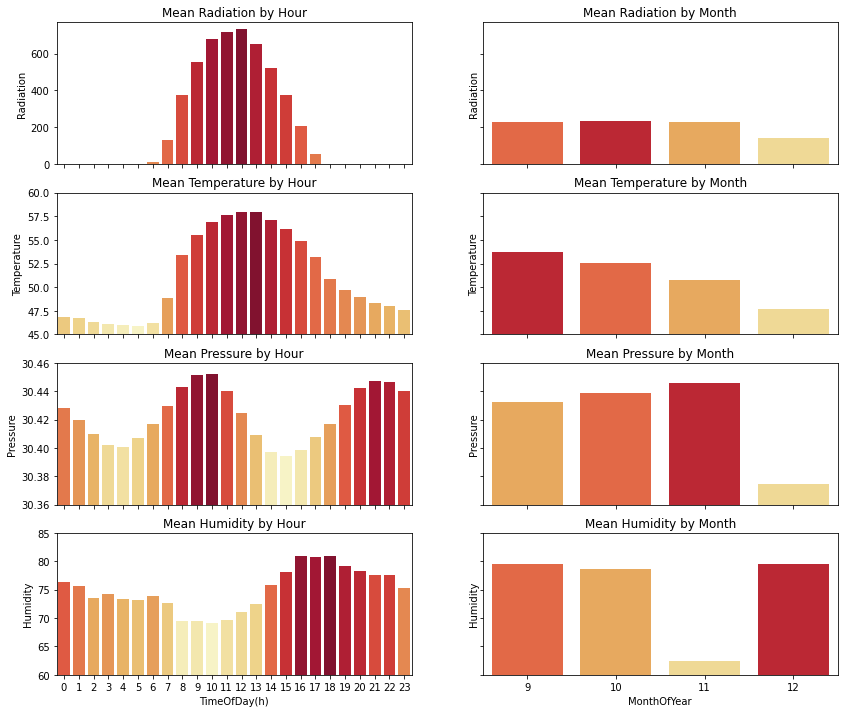

In [ ]:
import numpy as np

grouped_m=dataset.groupby('MonthOfYear').mean().reset_index()
grouped_w=dataset.groupby('WeekOfYear').mean().reset_index()
grouped_d=dataset.groupby('DayOfYear').mean().reset_index()
grouped_h=dataset.groupby('TimeOfDay(h)').mean().reset_index()

f, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, sharex='col', sharey='row', figsize=(14,12))
ax3.set_ylim(45,60)
ax5.set_ylim(30.36,30.46)
ax7.set_ylim(60,85)

ax1.set_title('Mean Radiation by Hour')
pal = sns.color_palette("YlOrRd_r", len(grouped_h))
rank = grouped_h['Radiation'].argsort().argsort() 
g = sns.barplot(x="TimeOfDay(h)", y='Radiation', data=grouped_h, palette=np.array(pal[::-1])[rank], ax=ax1)
ax1.set_xlabel('')

ax2.set_title('Mean Radiation by Month')
pal = sns.color_palette("YlOrRd_r", len(grouped_m))
rank = grouped_m['Radiation'].argsort().argsort() 
g = sns.barplot(x="MonthOfYear", y='Radiation', data=grouped_m, palette=np.array(pal[::-1])[rank], ax=ax2)
ax2.set_xlabel('')

ax3.set_title('Mean Temperature by Hour')
pal = sns.color_palette("YlOrRd_r", len(grouped_h))
rank = grouped_h['Temperature'].argsort().argsort() 
g = sns.barplot(x="TimeOfDay(h)", y='Temperature', data=grouped_h, palette=np.array(pal[::-1])[rank], ax=ax3)
ax3.set_xlabel('')

ax4.set_title('Mean Temperature by Month')
pal = sns.color_palette("YlOrRd_r", len(grouped_m))
rank = grouped_m['Temperature'].argsort().argsort() 
g = sns.barplot(x="MonthOfYear", y='Temperature', data=grouped_m, palette=np.array(pal[::-1])[rank], ax=ax4)
ax4.set_xlabel('')

ax5.set_title('Mean Pressure by Hour')
pal = sns.color_palette("YlOrRd_r", len(grouped_h))
rank = grouped_h['Pressure'].argsort().argsort() 
g = sns.barplot(x="TimeOfDay(h)", y='Pressure', data=grouped_h, palette=np.array(pal[::-1])[rank], ax=ax5)
ax5.set_xlabel('')

ax6.set_title('Mean Pressure by Month')
pal = sns.color_palette("YlOrRd_r", len(grouped_m))
rank = grouped_m['Pressure'].argsort().argsort() 
g = sns.barplot(x="MonthOfYear", y='Pressure', data=grouped_m, palette=np.array(pal[::-1])[rank], ax=ax6)
ax6.set_xlabel('')

ax7.set_title('Mean Humidity by Hour')
pal = sns.color_palette("YlOrRd_r", len(grouped_h))
rank = grouped_h['Humidity'].argsort().argsort() 
g = sns.barplot(x="TimeOfDay(h)", y='Humidity', data=grouped_h, palette=np.array(pal[::-1])[rank], ax=ax7)

ax8.set_title('Mean Humidity by Month')
pal = sns.color_palette("YlOrRd_r", len(grouped_m))
rank = grouped_m['Humidity'].argsort().argsort() 
g = sns.barplot(x="MonthOfYear", y='Humidity', data=grouped_m, palette=np.array(pal[::-1])[rank], ax=ax8)

plt.show()

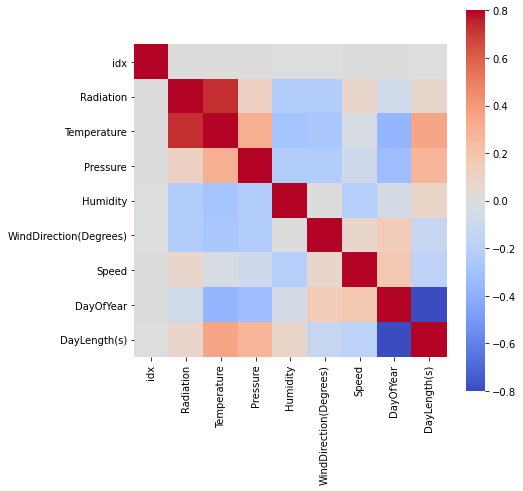

In [ ]:
corrmat = dataset.drop(['TimeOfDay(h)', 'TimeOfDay(m)', 'TimeOfDay(s)', 'UNIXTime', 'MonthOfYear', 'WeekOfYear'], inplace=False, axis=1)
corrmat = corrmat.corr()
f, ax = plt.subplots(figsize=(7,7))
sns.heatmap(corrmat, vmin=-.8, vmax=.8, square=True, cmap = 'coolwarm')
plt.show()

# Seperating variables

In [ ]:
X = dataset[['Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed', 'DayOfYear', 'TimeOfDay(s)']]
y = dataset['Radiation']

# Splitting the Dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Selection

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
regressor = RandomForestRegressor(n_estimators = 100,oob_score = 'TRUE', n_jobs = -1,random_state =50, 
                                  max_features = "auto", min_samples_leaf = 50)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
regressor = RandomForestRegressor(n_estimators = 100)
regressor.fit(X_train, y_train)
feature_importances = regressor.feature_importances_

X_train_opt = X_train.copy()
removed_columns = pd.DataFrame()
models = []
r2s_opt = []

for i in range(0,5):
    least_important = np.argmin(feature_importances)
    removed_columns = removed_columns.append(X_train_opt.pop(X_train_opt.columns[least_important]))
    regressor.fit(X_train_opt, y_train)
    feature_importances = regressor.feature_importances_
    accuracies = cross_val_score(estimator = regressor,
                                 X = X_train_opt,
                                 y = y_train, cv = 5,
                                 scoring = 'r2')
    r2s_opt = np.append(r2s_opt, accuracies.mean())
    models = np.append(models, ", ".join(list(X_train_opt)))
    
feature_selection = pd.DataFrame({'Features':models,'r2 Score':r2s_opt})
feature_selection.head()

,Features,r2 Score
0,"Temperature, Pressure, Humidity, WindDirection...",0.930985
1,"Temperature, Humidity, WindDirection(Degrees),...",0.928978
2,"Temperature, Humidity, DayOfYear, TimeOfDay(s)",0.929940
3,"Temperature, DayOfYear, TimeOfDay(s)",0.929793
4,"Temperature, TimeOfDay(s)",0.803696


# Fitting the regressor to key features

**Random Forest**

In [ ]:
X_train_best = X_train[['Temperature', 'DayOfYear', 'TimeOfDay(s)']]
X_test_best = X_test[['Temperature', 'DayOfYear', 'TimeOfDay(s)']]
regressor.fit(X_train_best, y_train)
print(regressor.score(X_train_best, y_train))
print(regressor.score(X_test_best, y_test))

0.9908394712693287
0.9338865872243666


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
lin2 = XGBRegressor() 
lin2.fit(X_train_best, y_train) 
lin2.score(X_train_best,y_train)

[05:06:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.884693711782505

**Deep learning**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


In [ ]:
def larger_model():
	# create model
	model = Sequential()
	model.add(Dense(10, input_dim=3, kernel_initializer='normal', activation='relu'))
	model.add(Dense(5, kernel_initializer='normal', activation='relu'));model.add(Dense(5, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_absolute_error', optimizer='adam')
	return model

In [ ]:
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=larger_model, epochs=100, batch_size=4, verbose=1)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=5)
results = cross_val_score(pipeline,X_train_best, y_train, cv=kfold)
print("Larger: %.2f (%.2f) MSE" % (results.mean(), results.std()))

# Cross Validation

In [ ]:
accuracies = cross_val_score(estimator = regressor, X = X_train_best,y = y_train, cv = 10, scoring = 'r2')
accuracy = accuracies.mean()
print('r2 = {}'.format(accuracy))

r2 = 0.931058310810321


# Validation of model

In [ ]:
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score,mean_absolute_error
y_pred = regressor.predict(X_test_best)
explained_variance_score = explained_variance_score(y_test, y_pred)
mean_squared_error = mean_squared_error(y_test, y_pred)
mean_absolute_error = mean_absolute_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print('explained variance = {}'.format(explained_variance_score))
print('mse = {}'.format(mean_squared_error))
print('mae = {}'.format(mean_absolute_error))
print('r2 = {}'.format(r_squared))

explained variance = 0.933888388267071
mse = 6469.0970873573515
mae = 30.4666465583174
r2 = 0.9338865872243666


# Prediction for Test data

In [ ]:
dataset2 = pd.read_csv('/content/gdrive/MyDrive/Dockship/solar_radiation_prediction_ai_challenge-dataset/TEST.csv')
dataset2.head()

,idx,UNIXTime,Data,Time,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,0,1482775250,12/26/2016 12:00:00 AM,08:00:50,48,30.47,101,187.78,4.50,06:55:00,17:51:00
1,1,1482774940,12/26/2016 12:00:00 AM,07:55:40,48,30.47,101,133.40,10.12,06:55:00,17:51:00
2,2,1482774649,12/26/2016 12:00:00 AM,07:50:49,48,30.47,101,160.69,5.62,06:55:00,17:51:00
3,3,1482774351,12/26/2016 12:00:00 AM,07:45:51,48,30.47,101,144.56,7.87,06:55:00,17:51:00
4,4,1482774039,12/26/2016 12:00:00 AM,07:40:39,48,30.47,101,169.05,10.12,06:55:00,17:51:00


In [ ]:
from datetime import datetime
from pytz import timezone
import pytz
hawaii= timezone('Pacific/Honolulu')
dataset2.index =  pd.to_datetime(dataset2['UNIXTime'], unit='s')
dataset2.index = dataset2.index.tz_localize(pytz.utc).tz_convert(hawaii)
dataset2['MonthOfYear'] = dataset2.index.strftime('%m').astype(int)
dataset2['DayOfYear'] = dataset2.index.strftime('%j').astype(int)
dataset2['WeekOfYear'] = dataset2.index.strftime('%U').astype(int)
dataset2['TimeOfDay(h)'] = dataset2.index.hour
dataset2['TimeOfDay(m)'] = dataset2.index.hour*60 + dataset2.index.minute
dataset2['TimeOfDay(s)'] = dataset2.index.hour*60*60 + dataset2.index.minute*60 + dataset2.index.second
dataset2['TimeSunRise'] = pd.to_datetime(dataset2['TimeSunRise'], format='%H:%M:%S')
dataset2['TimeSunSet'] = pd.to_datetime(dataset2['TimeSunSet'], format='%H:%M:%S')
dataset2['DayLength(s)'] = dataset2['TimeSunSet'].dt.hour*60*60 \
                           + dataset2['TimeSunSet'].dt.minute*60 \
                           + dataset2['TimeSunSet'].dt.second \
                           - dataset2['TimeSunRise'].dt.hour*60*60 \
                           - dataset2['TimeSunRise'].dt.minute*60 \
                           - dataset2['TimeSunRise'].dt.second
dataset2.drop(['Data','Time','TimeSunRise','TimeSunSet'], inplace=True, axis=1)
dataset2.head()

,idx,UNIXTime,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,MonthOfYear,DayOfYear,WeekOfYear,TimeOfDay(h),TimeOfDay(m),TimeOfDay(s),DayLength(s)
UNIXTime,,,,,,,,,,,,,,
2016-12-26 08:00:50-10:00,0,1482775250,48,30.47,101,187.78,4.50,12,361,52,8,480,28850,39360
2016-12-26 07:55:40-10:00,1,1482774940,48,30.47,101,133.40,10.12,12,361,52,7,475,28540,39360
2016-12-26 07:50:49-10:00,2,1482774649,48,30.47,101,160.69,5.62,12,361,52,7,470,28249,39360
2016-12-26 07:45:51-10:00,3,1482774351,48,30.47,101,144.56,7.87,12,361,52,7,465,27951,39360
2016-12-26 07:40:39-10:00,4,1482774039,48,30.47,101,169.05,10.12,12,361,52,7,460,27639,39360


In [ ]:
test = dataset2[['Temperature', 'DayOfYear', 'TimeOfDay(s)']]
pred = regressor.predict(test)

In [ ]:
id_sv = df2['idx']
sol = pd.DataFrame()
sol['idx']=id_sv
sol['Radiation']=pred
sol.to_csv('sol.csv',index = False)